#### ring down curve fit example
Loads sample data file and puts data into a pandas data frame.

Follow the curve fit example from [pycse](http://kitchingroup.cheme.cmu.edu/pycse/pycse.html), paragraph 7.5

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
# define the data frame
time = []
current = []
voltage = []
df = pd.DataFrame(columns=['Time','Current','Voltage'])

In [3]:
# read CSV
csv1 = pd.read_csv('sample ringdown.csv')

In [4]:
time = csv1['Time'].values
time = time.astype(float)

current = csv1['Current'].values
current = current.astype(float)

voltage = csv1['Voltage'].values
voltage = voltage.astype(float)

In [5]:
# put data into the frame
df = pd.DataFrame({
    'Time' : time,
    'Current' : current,
    'Voltage' : voltage
    })

In [6]:
print('number of points in the data set: {:d}'.format(csv1['Time'].count()))

number of points in the data set: 2270


In [7]:
# store the data frame as a pickle file
df.to_pickle('sample ringdown.pkl')

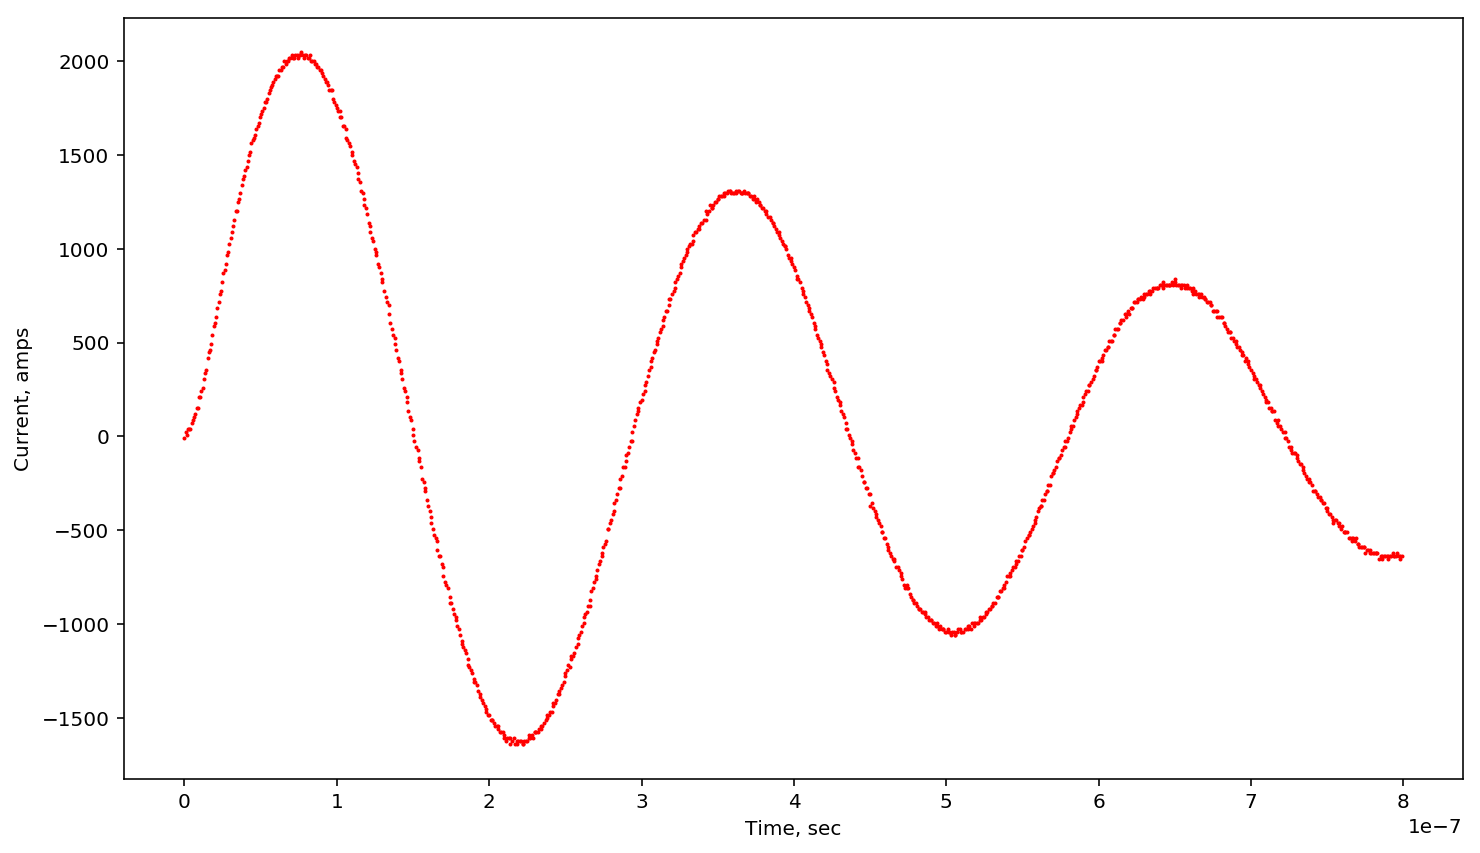

In [7]:
# plot some of the data
num_samples = 1000
#plt.plot(df['Time'].values, df['Voltage'].values)
plt.plot(df['Time'].values[0:num_samples], df['Current'].values[0:num_samples],'ro',markersize=1)
plt.xlabel('Time, sec')
plt.ylabel('Current, amps')
plt.show()

#### The Series RLC Circuit

The loop equation for the circuit is: $L\frac{di}{dt} + Ri + \frac{1}{C}\int_{0}^{i} idt + Vo = 0$

The circuit is under damped: $C \lt \frac{4L}{R^2}$

The resonant frequency is: $\omega _d = \frac{1}{\sqrt{LC}}$

The damping coefficient is: $\alpha = \frac{R}{2L}$

The damped frequency is: $\omega _d = \sqrt{\omega _{0}^{2}-\alpha ^{2}}$

The underdamped responce is: $i = e^{-\alpha t}(A_{1}cos\omega _d t + A_{2}sin\omega _d t)$

Intial capacitor voltage is 1000 volts.  

In [34]:
# following the example of paragraph 7.5
num_samples = 500
t1 = df['Time'].values[0:num_samples]
c1 = df['Current'].values[0:num_samples]

def rlc(parameters, t1):
    'From Phys. Rev. B 28, 5480 (1983)'
    R, L, C = parameters
    alpha = R/(2*L)
    wd = np.sqrt(1/(L*C) - alpha**2)
    I = 2000*np.exp(-alpha*t1)*np.sin(wd*t1)
    return I

def objective(pars, y, x):
    #we will minimize this function
    err =  y - rlc(pars, x)
    return err

x0 = [0.5, 0.22e-6, 10e-9] #initial guess of parameters

plsq = leastsq(objective, x0, args=(c1, t1))

print('Fitted parameters = {0}'.format(plsq[0]))


Fitted parameters = [  4.18780866e-01   2.06667652e-07   1.07039042e-08]


/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


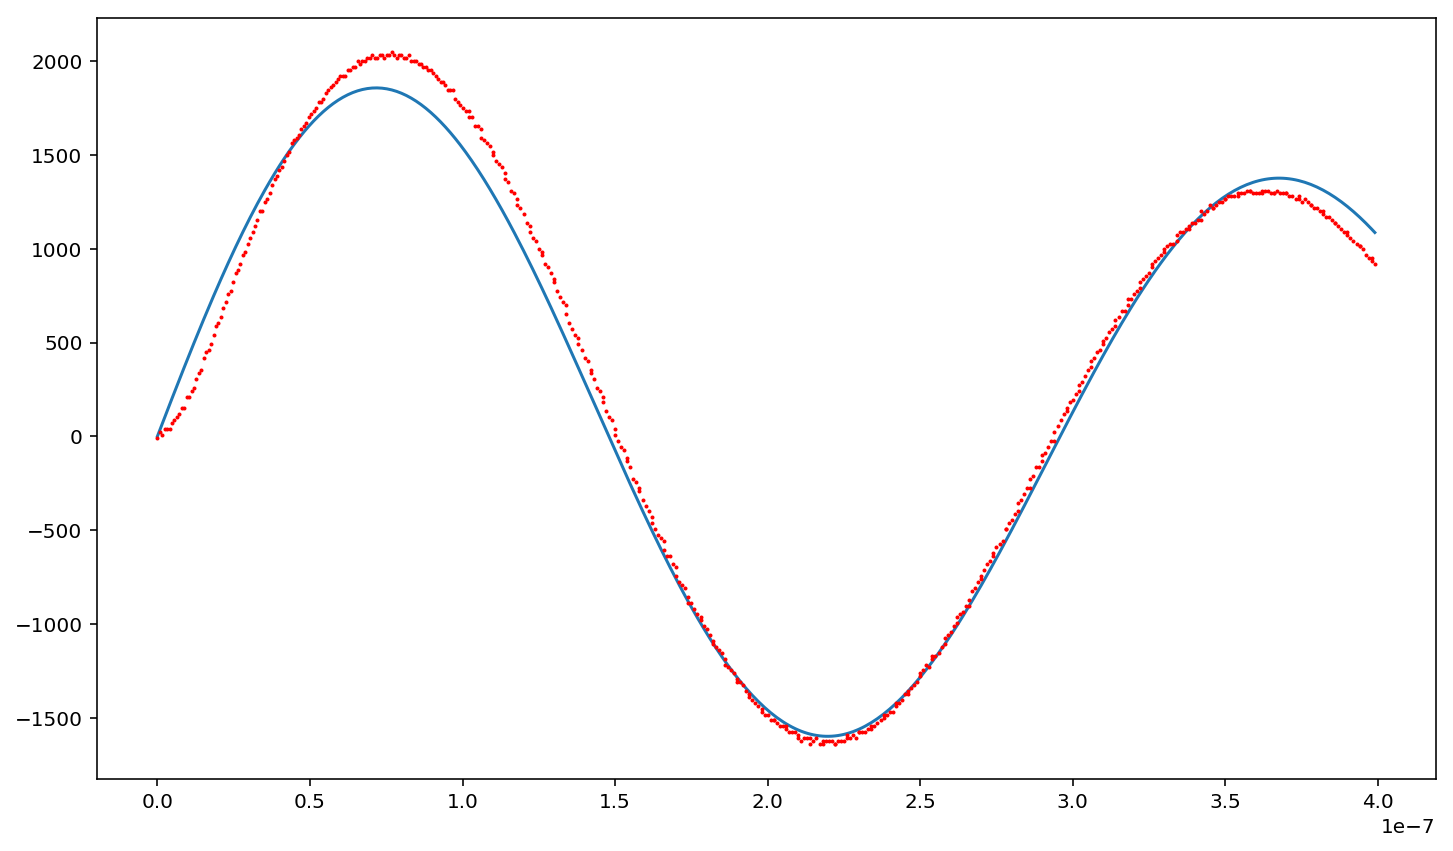

In [35]:
num_samples = 500
t1 = df['Time'].values[0:num_samples]
y = rlc(plsq[0], t1)
plt.plot(t1, y)
plt.plot(df['Time'].values[0:num_samples], df['Current'].values[0:num_samples],'ro',markersize=1)